In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./traffic_accidents.csv')
df.head()

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8
2,12/09/2021 10:30:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12
3,08/09/2023 07:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,5.0,0.0,0.0,5.0,0.0,0.0,19,4,8
4,08/19/2023 02:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,14,7,8


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209306 entries, 0 to 209305
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   crash_date                     209306 non-null  object 
 1   traffic_control_device         209306 non-null  object 
 2   weather_condition              209306 non-null  object 
 3   lighting_condition             209306 non-null  object 
 4   first_crash_type               209306 non-null  object 
 5   trafficway_type                209306 non-null  object 
 6   alignment                      209306 non-null  object 
 7   roadway_surface_cond           209306 non-null  object 
 8   road_defect                    209306 non-null  object 
 9   crash_type                     209306 non-null  object 
 10  intersection_related_i         209306 non-null  object 
 11  damage                         209306 non-null  object 
 12  prim_contributory_cause       

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_units,209306.0,2.063300,0.396012,1.0,2.0,2.0,2.0,11.0
injuries_total,209306.0,0.382717,0.799720,0.0,0.0,0.0,1.0,21.0
injuries_fatal,209306.0,0.001859,0.047502,0.0,0.0,0.0,0.0,3.0
injuries_incapacitating,209306.0,0.038102,0.233964,0.0,0.0,0.0,0.0,7.0
injuries_non_incapacitating,209306.0,0.221241,0.614960,0.0,0.0,0.0,0.0,21.0
injuries_reported_not_evident,209306.0,0.121516,0.450865,0.0,0.0,0.0,0.0,15.0
injuries_no_indication,209306.0,2.244002,1.241175,0.0,2.0,2.0,3.0,49.0
crash_hour,209306.0,13.373047,5.603830,0.0,9.0,14.0,17.0,23.0
crash_day_of_week,209306.0,4.144024,1.966864,1.0,2.0,4.0,6.0,7.0
crash_month,209306.0,6.771822,3.427593,1.0,4.0,7.0,10.0,12.0


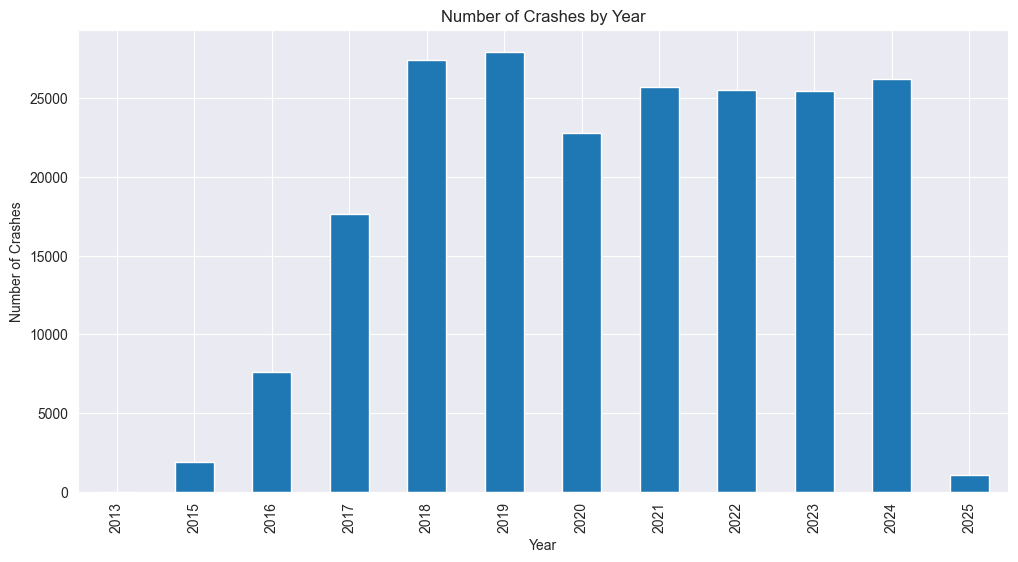

In [5]:
df['crash_date'] = pd.to_datetime(df['crash_date']) 
df['year'] = df['crash_date'].dt.year

plt.figure(figsize=(12, 6))
df['year'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Crashes by Year')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.show()

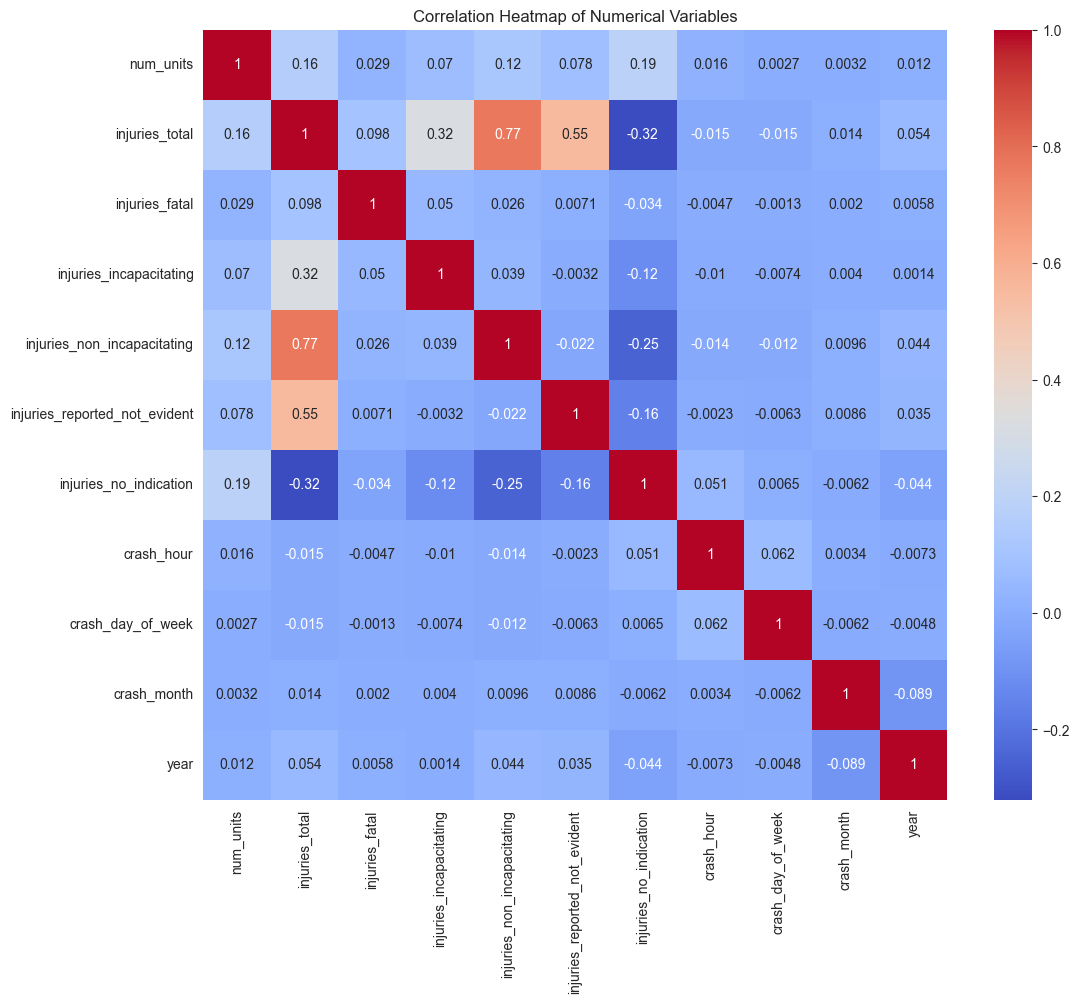

In [6]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

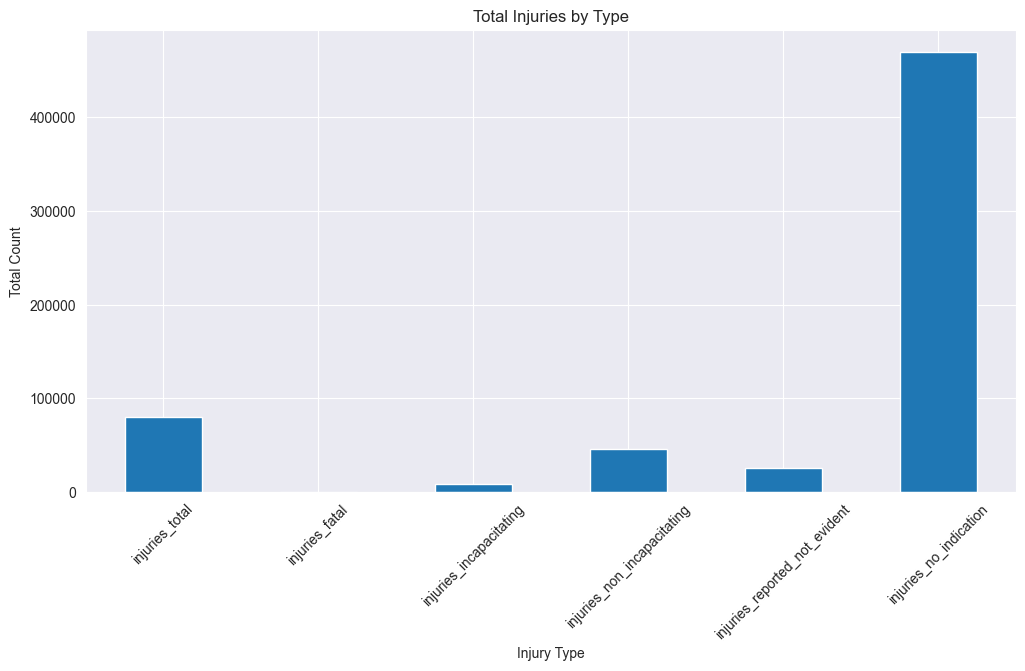

In [7]:
injury_columns = ['injuries_total', 'injuries_fatal', 'injuries_incapacitating', 
                  'injuries_non_incapacitating', 'injuries_reported_not_evident', 'injuries_no_indication']

plt.figure(figsize=(12, 6))
df[injury_columns].sum().plot(kind='bar')
plt.title('Total Injuries by Type')
plt.xlabel('Injury Type')
plt.ylabel('Total Count')
plt.xticks(rotation=45)
plt.show()

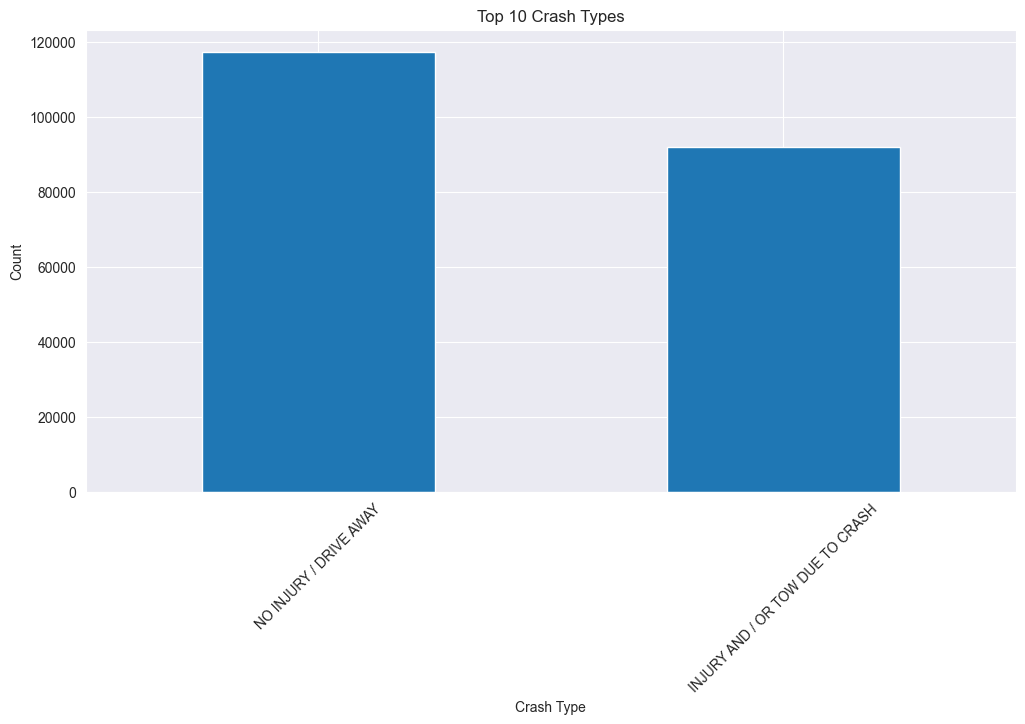

In [8]:
plt.figure(figsize=(12, 6))
df['crash_type'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Crash Types')
plt.xlabel('Crash Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

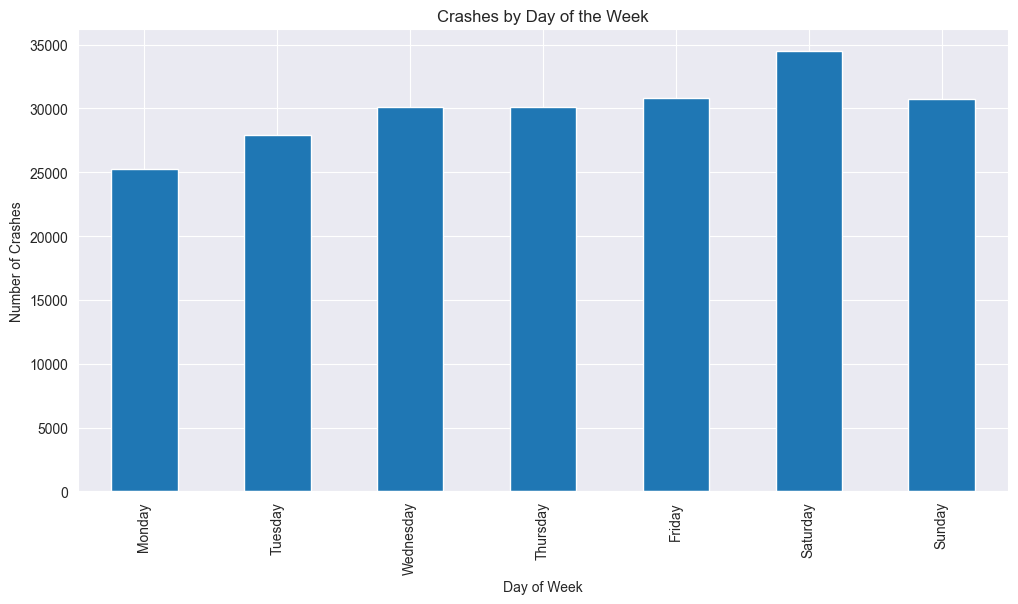

In [9]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(12, 6))
df['crash_day_of_week'].value_counts().sort_index().plot(kind='bar')
plt.title('Crashes by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Crashes')
plt.xticks(range(7), days)
plt.show()

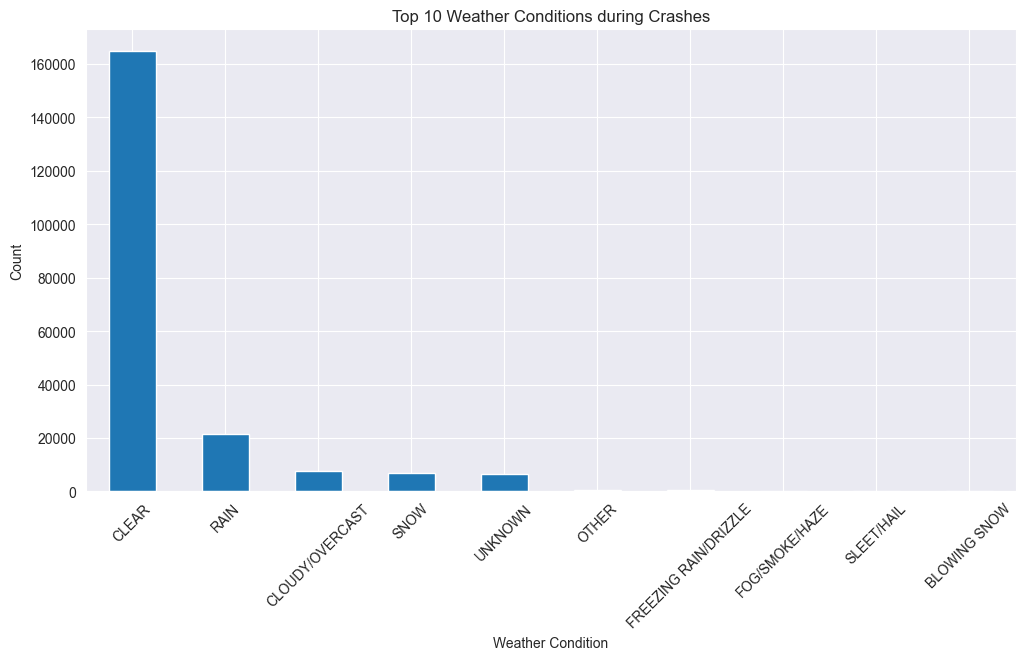

In [10]:
plt.figure(figsize=(12, 6))
df['weather_condition'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Weather Conditions during Crashes')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

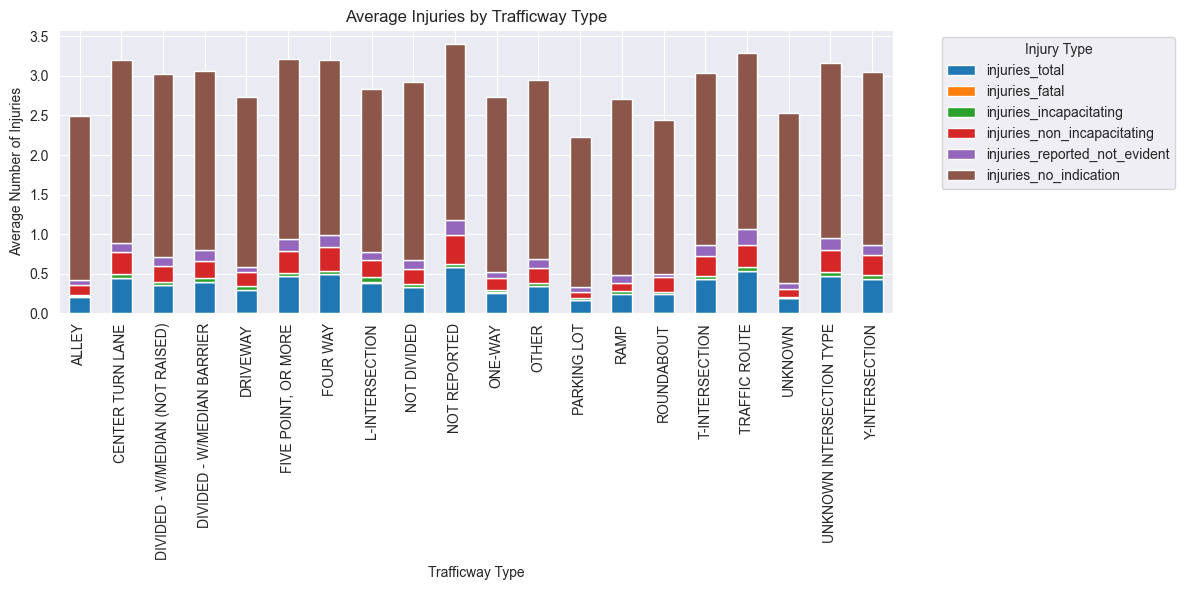

Total injuries by trafficway type:
 trafficway_type
NOT DIVIDED                        26049.0
FOUR WAY                           24155.0
DIVIDED - W/MEDIAN (NOT RAISED)    12251.0
DIVIDED - W/MEDIAN BARRIER          4271.0
T-INTERSECTION                      3978.0
ONE-WAY                             3247.0
OTHER                               1645.0
CENTER TURN LANE                    1272.0
UNKNOWN INTERSECTION TYPE            895.0
FIVE POINT, OR MORE                  522.0
Y-INTERSECTION                       415.0
TRAFFIC ROUTE                        413.0
NOT REPORTED                         341.0
UNKNOWN                              200.0
ALLEY                                157.0
RAMP                                  92.0
PARKING LOT                           74.0
L-INTERSECTION                        49.0
DRIVEWAY                              42.0
ROUNDABOUT                            37.0
Name: injuries_total, dtype: float64
Injury severity ratio by trafficway type:
 trafficw

In [11]:
injury_cols = ['injuries_total', 'injuries_fatal', 'injuries_incapacitating', 
               'injuries_non_incapacitating', 'injuries_reported_not_evident', 'injuries_no_indication']
grouped_injuries = df.groupby('trafficway_type')[injury_cols].mean()

ax = grouped_injuries.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Average Injuries by Trafficway Type')
plt.xlabel('Trafficway Type')
plt.ylabel('Average Number of Injuries')
plt.legend(title='Injury Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

total_injuries = df.groupby('trafficway_type')['injuries_total'].sum().sort_values(ascending=False)

print('Total injuries by trafficway type:\n', total_injuries)

df['severe_injuries'] = df['injuries_fatal'] + df['injuries_incapacitating']
severity_ratio = df.groupby('trafficway_type').agg({
    'severe_injuries': 'sum',
    'injuries_total': 'sum'
}).eval('severity_ratio = severe_injuries / injuries_total').sort_values('severity_ratio', ascending=False)

print('Injury severity ratio by trafficway type:\n', severity_ratio['severity_ratio'])